In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from warnings import filterwarnings
filterwarnings(action='ignore')

In [38]:
iris=pd.read_csv("iris.csv")
print(iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [39]:
print(iris.drop(columns='Id'))


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [40]:
print(iris.shape)

(150, 6)


In [41]:
print(iris.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [42]:
#Checking for null values
print(iris.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [43]:
x = len(iris[iris['Species'] == 'Iris-versicolor'])
print('No. of versicolor:',x)
x = len(iris[iris['Species'] == 'Iris-virginica'])
print('No. of versicolor:',x)
x = len(iris[iris['Species'] == 'Iris-setosa'])
print('No. of versicolor:',x)

No. of versicolor: 50
No. of versicolor: 50
No. of versicolor: 50


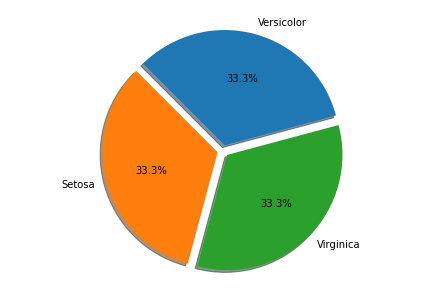

In [44]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

explode=(0.05,0.05,0.05)
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s,explode=explode, labels = l,autopct='%1.1f%%',shadow=True,startangle=15)
plt.show()

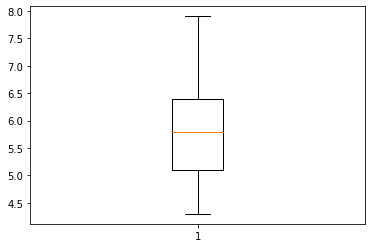

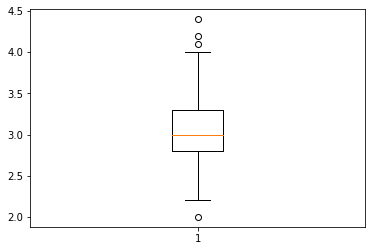

In [45]:
#Checking for outliars
import matplotlib.pyplot as plt
plt.figure(1)
plt.boxplot([iris['SepalLengthCm']])
plt.figure(2)
plt.boxplot([iris['SepalWidthCm']])
plt.show()

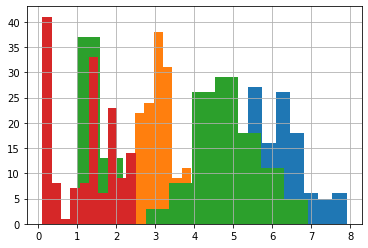

In [46]:
iris['SepalLengthCm'].hist()
iris['SepalWidthCm'].hist()
iris['PetalLengthCm'].hist()
iris['PetalWidthCm'].hist()
plt.show()

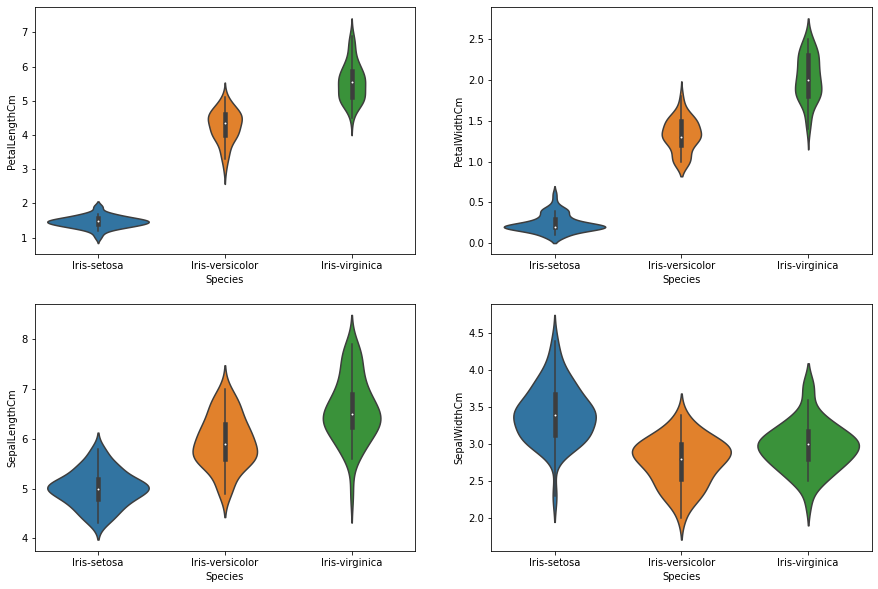

In [47]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)
plt.show()

In [48]:
#Correlation 
corr_mat = iris.corr()
print(corr_mat)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


In [49]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [50]:
#for ensuring reproducibility
np.random.seed(0)

In [51]:
train, test = train_test_split(iris, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 6)
(38, 6)


In [52]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
train_y = train.Species

test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
test_y = test.Species

In [53]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3


In [54]:
train_y.head()

61     Iris-versicolor
92     Iris-versicolor
112     Iris-virginica
2          Iris-setosa
141     Iris-virginica
Name: Species, dtype: object

# Evaluating our model with classifiers

In [55]:
#Using LogisticRegression
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy Score by Logistic Regression:',metrics.accuracy_score(prediction,test_y)*100)

Accuracy Score by Logistic Regression: 97.36842105263158


In [56]:
#Using Support Vector Machines
from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)

pred_y = model1.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score by Support Vector:",accuracy_score(test_y,pred_y)*100)

Accuracy Score by Support Vector: 97.36842105263158


In [57]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score by KNN:",accuracy_score(test_y,y_pred2)*100)

Accuracy Score by KNN: 97.36842105263158


In [58]:
#Using Naive Bayes
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(train_X,train_y)
y_pred3 = model3.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score by Naive Bayes:",accuracy_score(test_y,y_pred3)*100)

Accuracy Score by Naive Bayes: 100.0


In [59]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(train_X,train_y)
y_pred4 = model4.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score by Decision Tree:",accuracy_score(test_y,y_pred4)*100)

Accuracy Score by Decision Tree: 97.36842105263158


In [61]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector','KNN', 'Naive Bayes','Decision Tree'],
    'Score': [97.36,97.36,97.36,100.0,97.36]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Naive Bayes
97.36,Logistic Regression
97.36,Support Vector
97.36,KNN
97.36,Decision Tree


# Hence Naive Bayes has the highest accuracy of 100.0 . So, we will train our model with Naive Bayes algorithm.